In [76]:
import tensorflow 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from tensorflow.keras import regularizers
from tensorflow.keras import utils
from tensorflow.keras.layers import add, Conv2D,Input,BatchNormalization,TimeDistributed,Embedding,LSTM,GRU,Dense,MaxPooling1D,Dropout,LeakyReLU,ReLU,Flatten,concatenate,Bidirectional
# from tensorflow.keras.layers.merge import concatenate
from tensorflow.keras.models import Model,load_model

from tensorflow.keras import backend as K
# from model import InstantiateModel
from tensorflow.keras.models import Model
# from keras.optimizers import Adamax
from tensorflow.keras.layers import Input

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# optim = tf.keras.optimizers.Adam()

In [77]:
def InstantiateModel(in_):
    '''
      Architecture of the Deep Learning Model.
      Args:
        in_: input tensor shape
      Returns: Tensor model
    '''
    model_2_1 = GRU(32,return_sequences=True,activation=None,go_backwards=True)(in_)
    model_2 = LeakyReLU()(model_2_1)
    model_2 = GRU(128,return_sequences=True, activation=None,go_backwards=True)(model_2)
    #model_2 = BatchNormalization()(model_2)
    model_2 = LeakyReLU()(model_2)
    
    model_3 = GRU(64,return_sequences=True,activation=None,go_backwards=True)(in_)
    model_3 = LeakyReLU()(model_3)
    model_3 = GRU(128,return_sequences=True, activation=None,go_backwards=True)(model_3)
    #model_3 = BatchNormalization()(model_3)
    model_3 = LeakyReLU()(model_3)
    
    model_add_1 = add([model_3,model_2])
    
    model_5 = GRU(128,return_sequences=True,activation=None,go_backwards=True)(model_add_1)
    model_5 = LeakyReLU()(model_5)
    model_5 = GRU(32,return_sequences=True, activation=None,go_backwards=True)(model_5)
    model_5 = LeakyReLU()(model_5)
    
    model_6 = GRU(64,return_sequences=True,activation=None,go_backwards=True)(model_add_1)
    model_6 = LeakyReLU()(model_6)
    model_6 = Dropout(0.2)(model_6)
    model_6 = GRU(32,return_sequences=True, activation=None,go_backwards=True)(model_6)
    model_6 = LeakyReLU()(model_6)
    
    model_add_2 = add([model_5,model_6,model_2_1])
    
    model_7 = Dense(64, activation=None,)(model_add_2)
    model_7 = LeakyReLU()(model_7)
    model_7 = Dropout(0.5)(model_7)
    model_7 = Dense(16, activation=None)(model_7)
    model_7 = LeakyReLU()(model_7)
    
    model_9 = Dense(32, activation=None,kernel_regularizer=regularizers.l2(l2=0.01))(model_add_2)
    model_9 = LeakyReLU()(model_9)
    model_9 = Dropout(0.5)(model_9)
    model_9 = Dense(16, activation=None,kernel_regularizer=regularizers.l2(l2=0.01))(model_9)
    model_9 = LeakyReLU()(model_9)
    
    model_add_3 = add([model_7,model_9])

    model_10 = Dense(16, activation=None,activity_regularizer=regularizers.l2(l2=0.01))(model_add_3)
    #model_10 = BatchNormalization()(model_10)
    model_10 = LeakyReLU()(model_10)
    model_10 = Dropout(0.5)(model_10)
    #Model_7 = MaxPooling1D(pool_size=2)(mode)
    model_10 = Dense(8, activation="softmax")(model_10)
    
    return model_10

In [78]:
# time_steps = 1
# data_dim = 40
# Input_Sample = Input(shape=(time_steps,data_dim))
# Output_ = InstantiateModel(Input_Sample)
# Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)

In [79]:
# Model_Enhancer.summary()

In [132]:
def trainModel(xtrain,ytrain,xtest,ytest):
    '''
        Training the Neural Network model against the data.
        Args: 
            X: Array of features to be trained.
            y: Array of Target attribute.
        Returns: Save Trained model weights.
    '''
#     K.clear_session(X, y)
    
#     batch_size=X.shape[0]
#     time_steps=X.shape[1]
#     data_dim=X.shape[2]
    
    time_steps=x.shape[1]
    data_dim=x.shape[2]
    num_epochs=500
    
    Input_Sample = Input(shape=(time_steps,data_dim))
    Output_ = InstantiateModel(Input_Sample)
    Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)
    
#     opt=tf.keras.optimizers.RMSprop(
#     learning_rate=0.0001,
#     rho=0.9,
#     momentum=0.0,
#     epsilon=1e-07,
#     centered=False,
#     name="RMSprop",
# )

#     opt=tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     name="Adam",
# )

    opt=tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)al_accuracy: 0.4826
Epoch 323/500

    Model_Enhancer.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt
)

    ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.5, patience=10, 
                                          verbose=1, mode='auto', baseline=None,restore_best_weights=False)
    MC = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='auto', verbose=0, 
                                            save_best_only=True)
    
    #class_weights = class_weight.compute_sample_weight('balanced',
    #                                                 np.unique(y[:,0],axis=0),
    #                                                 y[:,0])
    
#     xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)
    ModelHistory = Model_Enhancer.fit(xtrain, ytrain, batch_size=32, epochs=num_epochs,
                                    validation_data=(xtest,ytest),
                                  callbacks = [MC],
                                  verbose=1)
    
    return ModelHistory,Model_Enhancer

In [81]:
# df=pd.read_csv('/home/bigpenguin/dataset&notebook/covid_data/covid_classification_dataset.csv')
df=pd.read_csv('/home/bigpenguin/dataset&notebook/emotions/emotions.csv')
# df = df.sample(frac=1).reset_index(drop=True)
df
# x=df.iloc[:,:40]
# c=df['disease']

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,status
0,-579.506104,50.247742,3.570510,13.125044,-4.089544,2.525334,-4.051580,-3.378175,-11.889141,-3.979980,...,0.836111,4.282889,4.200542,3.246489,3.697088,2.422562,2.038340,1.727409,1.808671,sad
1,-638.391846,54.519295,-11.489338,13.114046,-5.239916,-3.320850,-19.884142,-8.171749,-9.689508,5.591160,...,0.204697,-1.662609,-0.956451,-1.419356,0.233725,-0.828090,-0.966894,-0.923512,0.807629,sad
2,-611.312561,57.975601,-14.325385,2.772745,-21.664680,-4.589968,-14.878984,-13.237305,-12.390950,2.285462,...,-0.901908,-1.386100,-0.410920,-0.381696,-0.610176,0.189202,-0.304383,-0.889195,-1.157268,disgust
3,-555.593933,53.893394,-9.188742,10.715917,-5.871970,2.460884,-2.193217,-11.509013,-5.661096,2.829007,...,2.729406,4.482051,4.598544,4.851924,3.556366,2.283275,2.938268,2.242690,1.258236,surprise
4,-549.352112,46.562874,-12.258191,5.361658,-8.692786,-4.086108,-13.460393,-6.538026,-19.447844,-0.021230,...,2.256636,-1.143123,-1.228237,0.356789,4.394722,4.548160,5.749881,2.861266,1.892858,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-639.276367,69.992302,0.794220,17.575535,1.505518,5.529695,-16.711475,1.090629,-6.211516,-2.157690,...,-2.661220,-2.467383,-1.095932,-1.954725,-2.329174,-3.309138,-4.987135,-3.522935,-2.290213,calm
1436,-764.551331,48.757034,1.969468,3.160613,-8.093986,2.767728,-21.341684,-3.213837,-8.663400,1.914731,...,6.775043,6.996617,6.898575,2.933432,2.239449,0.315037,3.183671,2.054072,2.369820,disgust
1437,-615.372986,80.056709,-3.214272,15.165060,-8.458153,10.247187,-10.889669,-8.196477,-6.621163,0.405029,...,0.385411,0.671627,0.911507,2.562104,1.764950,1.726235,0.731389,1.639959,1.772235,disgust
1438,-554.079407,41.643890,-13.349830,5.999964,-5.766280,-3.517231,-11.591644,-0.583387,-15.365607,-4.840581,...,0.306123,-0.160038,-1.305185,-0.875354,0.363280,0.814992,1.650947,0.910835,-0.008471,angry


In [82]:
df['status'].value_counts()

fear        192
angry       192
happy       192
disgust     192
calm        192
surprise    192
sad         192
neutral      96
Name: status, dtype: int64

In [83]:
sorted(df['status'].unique())

['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [84]:
# sss=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
# for train_index, test_index in sss.split(x,y):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     train = df.loc[train_index]
#     test = df.loc[test_index]
    
# dd=pd.concat([train,test])
# dd

In [85]:
x=df.iloc[:,:40].values
y=df['status'].values

In [86]:
x.shape,y.shape

((1440, 40), (1440,))

In [87]:
y

array(['sad', 'sad', 'disgust', ..., 'disgust', 'angry', 'happy'],
      dtype=object)

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [89]:
y

array([6, 6, 2, ..., 2, 0, 4])

In [90]:
y = to_categorical(y)

In [91]:
x = x.reshape(x.shape[0],1,-1)

In [92]:
x.shape,y.shape

((1440, 1, 40), (1440, 8))

In [93]:
y = y.reshape(y.shape[0],1,-1)

In [94]:
x.shape,y.shape

((1440, 1, 40), (1440, 1, 8))

In [95]:
y

array([[[0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 1., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [133]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20,random_state=0)
history,model=trainModel(xtrain,ytrain,xtest,ytest)

Epoch 1/500
36/36 [==============================] - 7s 37ms/step - loss: 340.4497 - accuracy: 0.1259 - val_loss: 34.7958 - val_accuracy: 0.1181
Epoch 2/500
 9/36 [======>.......................] - ETA: 0s - loss: 81.7797 - accuracy: 0.1146

/home/bigpenguin/.local/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


36/36 [==============================] - 0s 7ms/step - loss: 68.6572 - accuracy: 0.1215 - val_loss: 21.1514 - val_accuracy: 0.1181
Epoch 3/500
36/36 [==============================] - 0s 7ms/step - loss: 45.8211 - accuracy: 0.1198 - val_loss: 16.4979 - val_accuracy: 0.1146
Epoch 4/500
36/36 [==============================] - 0s 7ms/step - loss: 34.0581 - accuracy: 0.1181 - val_loss: 13.2174 - val_accuracy: 0.1146
Epoch 5/500
36/36 [==============================] - 0s 7ms/step - loss: 24.9358 - accuracy: 0.1094 - val_loss: 9.8344 - val_accuracy: 0.1181
Epoch 6/500
36/36 [==============================] - 0s 8ms/step - loss: 18.9105 - accuracy: 0.1415 - val_loss: 8.7708 - val_accuracy: 0.1146
Epoch 7/500
36/36 [==============================] - 0s 8ms/step - loss: 15.0742 - accuracy: 0.1163 - val_loss: 6.4848 - val_accuracy: 0.1111
Epoch 8/500
36/36 [==============================] - 0s 9ms/step - loss: 12.2242 - accuracy: 0.1207 - val_loss: 5.3367 - val_accuracy: 0.1111
Epoch 9/500
36/

Epoch 60/500
36/36 [==============================] - 0s 7ms/step - loss: 2.8941 - accuracy: 0.1571 - val_loss: 2.6000 - val_accuracy: 0.1979
Epoch 61/500
36/36 [==============================] - 0s 7ms/step - loss: 2.9049 - accuracy: 0.1476 - val_loss: 2.6160 - val_accuracy: 0.1875
Epoch 62/500
36/36 [==============================] - 0s 7ms/step - loss: 2.9076 - accuracy: 0.1589 - val_loss: 2.6842 - val_accuracy: 0.1424
Epoch 63/500
36/36 [==============================] - 0s 7ms/step - loss: 2.9035 - accuracy: 0.1441 - val_loss: 2.6092 - val_accuracy: 0.1944
Epoch 64/500
36/36 [==============================] - 0s 7ms/step - loss: 2.8777 - accuracy: 0.1554 - val_loss: 2.6120 - val_accuracy: 0.1597
Epoch 65/500
36/36 [==============================] - 0s 7ms/step - loss: 2.8420 - accuracy: 0.1536 - val_loss: 2.6768 - val_accuracy: 0.1319
Epoch 66/500
36/36 [==============================] - 0s 7ms/step - loss: 2.8882 - accuracy: 0.1554 - val_loss: 2.5866 - val_accuracy: 0.1806
Epoch 

36/36 [==============================] - 0s 8ms/step - loss: 2.5240 - accuracy: 0.2083 - val_loss: 2.4618 - val_accuracy: 0.1701
Epoch 118/500
36/36 [==============================] - 0s 7ms/step - loss: 2.5470 - accuracy: 0.2118 - val_loss: 2.4621 - val_accuracy: 0.2292
Epoch 119/500
36/36 [==============================] - 0s 8ms/step - loss: 2.5272 - accuracy: 0.1997 - val_loss: 2.4514 - val_accuracy: 0.2014
Epoch 120/500
36/36 [==============================] - 0s 7ms/step - loss: 2.5219 - accuracy: 0.2049 - val_loss: 2.4628 - val_accuracy: 0.2083
Epoch 121/500
36/36 [==============================] - 0s 8ms/step - loss: 2.5505 - accuracy: 0.1910 - val_loss: 2.4454 - val_accuracy: 0.2569
Epoch 122/500
36/36 [==============================] - 0s 7ms/step - loss: 2.4980 - accuracy: 0.2214 - val_loss: 2.4761 - val_accuracy: 0.1562
Epoch 123/500
36/36 [==============================] - 0s 10ms/step - loss: 2.5311 - accuracy: 0.2266 - val_loss: 2.4069 - val_accuracy: 0.2743
Epoch 124/50

36/36 [==============================] - 0s 7ms/step - loss: 2.1567 - accuracy: 0.3316 - val_loss: 2.0890 - val_accuracy: 0.3611
Epoch 175/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1355 - accuracy: 0.3333 - val_loss: 2.0688 - val_accuracy: 0.3889
Epoch 176/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1299 - accuracy: 0.3568 - val_loss: 2.0940 - val_accuracy: 0.3472
Epoch 177/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1386 - accuracy: 0.3533 - val_loss: 2.0663 - val_accuracy: 0.3750
Epoch 178/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1871 - accuracy: 0.3082 - val_loss: 2.0709 - val_accuracy: 0.3576
Epoch 179/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1279 - accuracy: 0.3498 - val_loss: 2.0747 - val_accuracy: 0.3924
Epoch 180/500
36/36 [==============================] - 0s 7ms/step - loss: 2.1312 - accuracy: 0.3550 - val_loss: 2.0316 - val_accuracy: 0.4306
Epoch 181/500

36/36 [==============================] - 0s 7ms/step - loss: 1.8194 - accuracy: 0.4306 - val_loss: 1.7610 - val_accuracy: 0.4722
Epoch 232/500
36/36 [==============================] - 0s 7ms/step - loss: 1.8089 - accuracy: 0.4470 - val_loss: 1.9697 - val_accuracy: 0.3576
Epoch 233/500
36/36 [==============================] - 0s 6ms/step - loss: 1.7899 - accuracy: 0.4531 - val_loss: 1.7954 - val_accuracy: 0.4236
Epoch 234/500
36/36 [==============================] - 0s 7ms/step - loss: 1.7992 - accuracy: 0.4540 - val_loss: 1.9070 - val_accuracy: 0.3715
Epoch 235/500
36/36 [==============================] - 0s 7ms/step - loss: 1.7721 - accuracy: 0.4661 - val_loss: 1.7890 - val_accuracy: 0.4688
Epoch 236/500
36/36 [==============================] - 0s 7ms/step - loss: 1.7620 - accuracy: 0.4609 - val_loss: 1.7685 - val_accuracy: 0.4722
Epoch 237/500
36/36 [==============================] - 0s 7ms/step - loss: 1.7907 - accuracy: 0.4340 - val_loss: 1.7483 - val_accuracy: 0.4792
Epoch 238/500

36/36 [==============================] - 0s 7ms/step - loss: 1.5654 - accuracy: 0.5312 - val_loss: 1.6148 - val_accuracy: 0.5069
Epoch 289/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5334 - accuracy: 0.5460 - val_loss: 1.6154 - val_accuracy: 0.4757
Epoch 290/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5269 - accuracy: 0.5382 - val_loss: 1.6663 - val_accuracy: 0.4792
Epoch 291/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5672 - accuracy: 0.5217 - val_loss: 1.6116 - val_accuracy: 0.5139
Epoch 292/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5155 - accuracy: 0.5399 - val_loss: 1.5942 - val_accuracy: 0.4896
Epoch 293/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5200 - accuracy: 0.5356 - val_loss: 1.6360 - val_accuracy: 0.5000
Epoch 294/500
36/36 [==============================] - 0s 7ms/step - loss: 1.5252 - accuracy: 0.5217 - val_loss: 1.6573 - val_accuracy: 0.4514
Epoch 295/500

36/36 [==============================] - 0s 7ms/step - loss: 1.3227 - accuracy: 0.6094 - val_loss: 1.6488 - val_accuracy: 0.5243
Epoch 346/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3792 - accuracy: 0.5799 - val_loss: 1.5717 - val_accuracy: 0.4965
Epoch 347/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3597 - accuracy: 0.5885 - val_loss: 1.6453 - val_accuracy: 0.4653
Epoch 348/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3521 - accuracy: 0.5807 - val_loss: 1.5901 - val_accuracy: 0.4757
Epoch 349/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3195 - accuracy: 0.6094 - val_loss: 1.5749 - val_accuracy: 0.5104
Epoch 350/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3325 - accuracy: 0.6085 - val_loss: 1.5909 - val_accuracy: 0.4931
Epoch 351/500
36/36 [==============================] - 0s 7ms/step - loss: 1.3057 - accuracy: 0.6033 - val_loss: 1.5841 - val_accuracy: 0.4965
Epoch 352/500

36/36 [==============================] - 0s 6ms/step - loss: 1.1439 - accuracy: 0.6641 - val_loss: 1.5875 - val_accuracy: 0.5312
Epoch 403/500
36/36 [==============================] - 0s 7ms/step - loss: 1.1218 - accuracy: 0.6753 - val_loss: 1.5603 - val_accuracy: 0.5069
Epoch 404/500
36/36 [==============================] - 0s 6ms/step - loss: 1.1663 - accuracy: 0.6432 - val_loss: 1.5235 - val_accuracy: 0.5000
Epoch 405/500
36/36 [==============================] - 0s 6ms/step - loss: 1.1382 - accuracy: 0.6753 - val_loss: 1.5576 - val_accuracy: 0.5139
Epoch 406/500
36/36 [==============================] - 0s 6ms/step - loss: 1.1036 - accuracy: 0.6927 - val_loss: 1.5680 - val_accuracy: 0.5278
Epoch 407/500
36/36 [==============================] - 0s 6ms/step - loss: 1.1300 - accuracy: 0.6641 - val_loss: 1.5222 - val_accuracy: 0.5174
Epoch 408/500
36/36 [==============================] - 0s 6ms/step - loss: 1.1248 - accuracy: 0.6840 - val_loss: 1.5581 - val_accuracy: 0.5069
Epoch 409/500

36/36 [==============================] - 0s 8ms/step - loss: 0.9306 - accuracy: 0.7491 - val_loss: 1.4912 - val_accuracy: 0.5694
Epoch 460/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9412 - accuracy: 0.7231 - val_loss: 1.5436 - val_accuracy: 0.5625
Epoch 461/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9626 - accuracy: 0.7300 - val_loss: 1.4823 - val_accuracy: 0.5521
Epoch 462/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9436 - accuracy: 0.7396 - val_loss: 1.6155 - val_accuracy: 0.5174
Epoch 463/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9697 - accuracy: 0.7300 - val_loss: 1.5970 - val_accuracy: 0.5139
Epoch 464/500
36/36 [==============================] - 0s 7ms/step - loss: 0.9301 - accuracy: 0.7491 - val_loss: 1.4732 - val_accuracy: 0.5312
Epoch 465/500
36/36 [==============================] - 0s 6ms/step - loss: 0.9314 - accuracy: 0.7535 - val_loss: 1.5011 - val_accuracy: 0.5625
Epoch 466/500

Best Validation Loss: 1.4348
Best Validation Accuracy: 0.5799


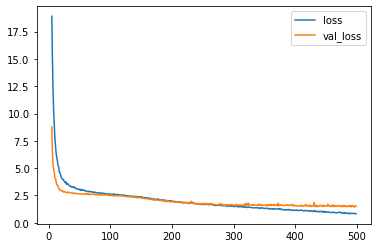

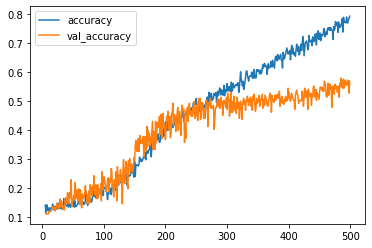

In [134]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [98]:
# model.save('Adam_lr_0.001_bval_0.90_bloss_0.45_3_L2_3dro1dro_0.5_0.2.h5')

In [99]:
# model.evaluate(xtest, ytest, batch_size=32)

In [100]:
ypred=model.predict(xtest)
ypred

array([[[0.2419744 , 0.01184722, 0.10251713, ..., 0.03516248,
         0.10184893, 0.13964102]],

       [[0.14618474, 0.06653962, 0.1490933 , ..., 0.07520325,
         0.11997895, 0.17599317]],

       [[0.11067884, 0.12213482, 0.15239261, ..., 0.10272904,
         0.12517771, 0.16353248]],

       ...,

       [[0.1122397 , 0.01175458, 0.05756874, ..., 0.03126986,
         0.13270931, 0.14788651]],

       [[0.10975122, 0.09665233, 0.14573975, ..., 0.08481439,
         0.15538348, 0.16738506]],

       [[0.24729429, 0.02850752, 0.12970646, ..., 0.03810676,
         0.12483443, 0.16000791]]], dtype=float32)

In [101]:
ypred.shape

(288, 1, 8)

In [102]:
ypreds=np.squeeze(ypred)

In [103]:
ypreds.shape

(288, 8)

In [104]:
argpred=np.argmax(ypreds,axis=1)

In [105]:
argpred

array([0, 7, 7, 2, 7, 1, 0, 3, 3, 3, 3, 7, 3, 7, 6, 7, 3, 3, 0, 1, 0, 6,
       7, 3, 0, 1, 1, 2, 2, 7, 3, 6, 1, 4, 2, 1, 1, 0, 1, 0, 2, 3, 7, 1,
       4, 1, 7, 1, 3, 3, 2, 4, 1, 1, 0, 1, 3, 3, 7, 0, 7, 1, 1, 0, 0, 1,
       4, 2, 1, 1, 4, 3, 3, 2, 2, 1, 7, 2, 1, 1, 0, 2, 7, 0, 7, 7, 3, 3,
       0, 7, 3, 3, 3, 2, 0, 4, 2, 2, 6, 3, 1, 3, 0, 4, 1, 1, 0, 1, 3, 1,
       7, 3, 1, 0, 7, 3, 0, 3, 1, 2, 7, 7, 0, 7, 0, 2, 1, 1, 2, 7, 0, 3,
       1, 2, 4, 7, 1, 7, 0, 3, 0, 2, 3, 1, 4, 1, 7, 2, 0, 3, 6, 4, 6, 6,
       4, 1, 2, 2, 1, 3, 0, 6, 6, 4, 3, 3, 1, 4, 3, 7, 4, 0, 7, 6, 0, 1,
       0, 2, 2, 3, 3, 4, 1, 3, 1, 1, 0, 1, 1, 7, 7, 1, 3, 1, 4, 2, 0, 0,
       6, 7, 4, 1, 0, 0, 0, 0, 7, 7, 7, 0, 7, 3, 2, 4, 0, 7, 2, 7, 6, 3,
       7, 0, 4, 7, 3, 0, 4, 2, 1, 4, 7, 2, 6, 2, 6, 3, 3, 1, 3, 2, 7, 3,
       0, 1, 2, 0, 2, 4, 6, 4, 1, 1, 7, 1, 2, 4, 4, 0, 7, 1, 7, 3, 3, 3,
       6, 1, 3, 0, 7, 3, 2, 1, 0, 0, 1, 2, 6, 1, 2, 7, 3, 2, 0, 1, 7, 3,
       7, 0])

In [106]:
ytests=np.squeeze(ytest)

In [107]:
ytests

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [108]:
argtest=np.argmax(ytests,axis=1)

In [109]:
argtest

array([0, 2, 4, 2, 2, 1, 0, 6, 3, 0, 3, 4, 6, 7, 6, 3, 3, 4, 0, 1, 0, 6,
       6, 3, 0, 6, 6, 2, 2, 6, 7, 6, 2, 4, 0, 1, 6, 7, 1, 0, 0, 4, 7, 5,
       2, 5, 0, 5, 7, 3, 0, 7, 2, 1, 0, 1, 6, 6, 7, 0, 3, 5, 1, 0, 0, 1,
       4, 1, 1, 5, 4, 3, 3, 2, 1, 1, 7, 2, 1, 5, 0, 0, 4, 0, 2, 7, 5, 3,
       0, 2, 7, 6, 3, 7, 2, 2, 2, 2, 5, 3, 1, 4, 0, 7, 1, 6, 4, 1, 7, 1,
       2, 3, 6, 6, 7, 0, 4, 3, 5, 2, 7, 3, 0, 6, 0, 2, 1, 5, 5, 3, 4, 3,
       5, 5, 1, 7, 1, 4, 0, 3, 2, 0, 6, 1, 2, 6, 1, 1, 0, 7, 1, 0, 6, 5,
       4, 5, 0, 7, 1, 0, 0, 6, 5, 4, 2, 3, 1, 4, 4, 2, 3, 0, 1, 3, 7, 1,
       0, 4, 7, 4, 4, 3, 1, 6, 6, 7, 0, 1, 1, 2, 7, 3, 7, 1, 3, 2, 7, 0,
       1, 3, 6, 6, 0, 0, 0, 2, 6, 0, 4, 0, 3, 4, 2, 2, 0, 4, 2, 2, 6, 3,
       1, 7, 4, 4, 2, 7, 7, 1, 5, 7, 7, 2, 6, 0, 5, 3, 3, 1, 2, 2, 7, 3,
       4, 1, 0, 0, 4, 4, 6, 4, 1, 1, 6, 5, 0, 4, 4, 0, 7, 6, 6, 4, 3, 3,
       6, 1, 3, 0, 6, 0, 1, 2, 0, 2, 5, 0, 7, 1, 5, 6, 3, 6, 0, 1, 2, 3,
       2, 2])

In [110]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

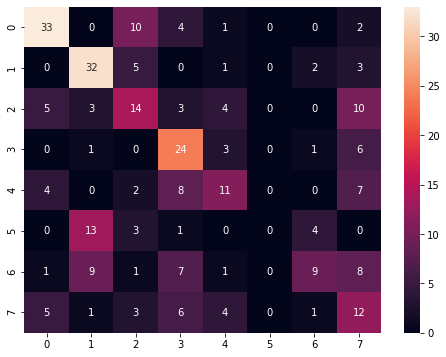

In [111]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(8 ,6)
sns.heatmap(confusion_matrix(argtest,argpred),annot=True,fmt='g')

In [112]:
accuracy_score(argtest,argpred)

0.46875

In [113]:
print(classification_report(argtest,argpred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.54      0.74      0.63        43
           2       0.37      0.36      0.36        39
           3       0.45      0.69      0.55        35
           4       0.44      0.34      0.39        32
           5       0.00      0.00      0.00        21
           6       0.53      0.25      0.34        36
           7       0.25      0.38      0.30        32

    accuracy                           0.47       288
   macro avg       0.41      0.43      0.40       288
weighted avg       0.45      0.47      0.44       288



/home/bigpenguin/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# train_size=int(len(df)*0.70)
# test_size=len(df)-train_size

# train_data=df[0:train_size]
# test_data=df[516:len(df)]

# # train_data,test_data
# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)


In [115]:
# def create_dataset(dataset, time_step=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-time_step-1):
#         a = dataset.iloc[i:(i+time_step), 0]   
#         dataX.append(a)
#         dataset.iloc[i + time_step, 0]
#         dataY.append(dataset.iloc[i + time_step, 0])
#     return np.array(dataX), np.array(dataY)


In [116]:
# time_step = 40
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, y_test = create_dataset(test_data, time_step)
# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [117]:
# x_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1] )
# x_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

# print("X_train: ", x_train.shape)
# print("X_test: ", x_test.shape)

In [118]:
# y_train[0]

In [119]:
# y_train = to_categorical(y_train,)
# y_test = to_categorical(y_test)

In [120]:
# trainModel(x_train,y_train,x_test,y_test)